# **Mock data and the ΛCDM model fiting**
## **CMB Angular Power Spectra plots**

In [1]:
#Import packages
import numpy as np
import classy
from classy import Class
import csv

### Read the Planck data (Downloaded from [the ESA Archive](https://pla.esac.esa.int/#home))

In [2]:
#------------------------------------------------------------------------------------------------
#TT polarization
#------------------------------------------------------------------------------------------------
data_Planck = np.loadtxt('./COM_PowerSpect_CMB-TT-binned_R3.01.txt')
ls_Planck_TT = data_Planck[:, 0] #Multipole moment
dl_Planck_TT = data_Planck[:, 1] #dlTTs
sdl_Planck_TT = data_Planck[:, 2] #error of dlTTs

#------------------------------------------------------------------------------------------------
#TE polarization
#------------------------------------------------------------------------------------------------
data_Planck = np.loadtxt('./COM_PowerSpect_CMB-TE-binned_R3.02.txt')
ls_Planck_TE = data_Planck[:, 0] #Multipole moment
dl_Planck_TE = data_Planck[:, 1] #dlTEs
sdl_Planck_TE = data_Planck[:, 2] #error of dlTEs

#------------------------------------------------------------------------------------------------
#EE polarization
#------------------------------------------------------------------------------------------------
data_Planck = np.loadtxt('./COM_PowerSpect_CMB-EE-binned_R3.02.txt')
ls_Planck_EE = data_Planck[:, 0] #Multipole moment
dl_Planck_EE = data_Planck[:, 1] #dlEEs
sdl_Planck_EE = data_Planck[:, 2] #error of dlEEs

## Initialize [MG-CLASS](https://gitlab.com/zizgitlab/mgclass--ii/) for the ΛCDM plots 
### (MoG code with ΛCDM specifications)

In [3]:
#------------------------------------------------------------------------------------------------
#Initialize LCDM model: F_R0 = 0, FRn= 0,
#------------------------------------------------------------------------------------------------
params = {'A_s': 2.100549e-09,
          'n_s': 0.9660499,
          'h': 0.6732117,
          'omega_b': 0.02238280,
          'omega_cdm': 0.1201075,
          'tau_reio': 0.05430842,
          'gauge':'newtonian', #FOR MGCLASS TO WORK, GAUGE NEEDS TO BE NEWTONIAN
          'output': 'tCl, pCl, lCl',
          'l_max_scalars': 2500,
        }

label = '_FR0_LCDM'
FR00 = 1.e-90
LambdaCDM = Class()        

params['mg_ansatz'] = 'FR'

model_params = {                
        'F_R0': FR00,
        'FRn': 0.}

params.update(model_params)

LambdaCDM.set(params)
LambdaCDM.compute()

    ******************************************
       Modified Gravity extensions enabled:  
       Modifications active for z < 6.000    
       For the FR model
    ******************************************


In [4]:
#Get all C_ls output
cls1 = LambdaCDM.raw_cl(2500) #LCDM
# To check the format of cls
cls1.keys()

ll = cls1['ell'] #Multipole moment l
clTT_LCDM = cls1['tt'] #TT polarization
clTE_LCDM = cls1['te'] #TE polarization
clEE_LCDM = cls1['ee'] #EE polarization

In [5]:
import matplotlib.pyplot as plt
from math import pi

#Conversion factor between Class (dimensionless) and CAMB (micro-Kelvin^2) values 
Tcmb = 2.7255
CF = (Tcmb*10**6)**2

#Function for converting the c_ls^TT to Dls (for plotting and comparing)
import math
def Dls(l,CTT):
    Dl = [CF*l[i]*(l[i]+1)*CTT[i]/(2*math.pi) for i in range(len(l))]
    return Dl

## Plot the $C^{TT}_{\ell}$ polarization mode, Planck data + CLASS ΛCDM

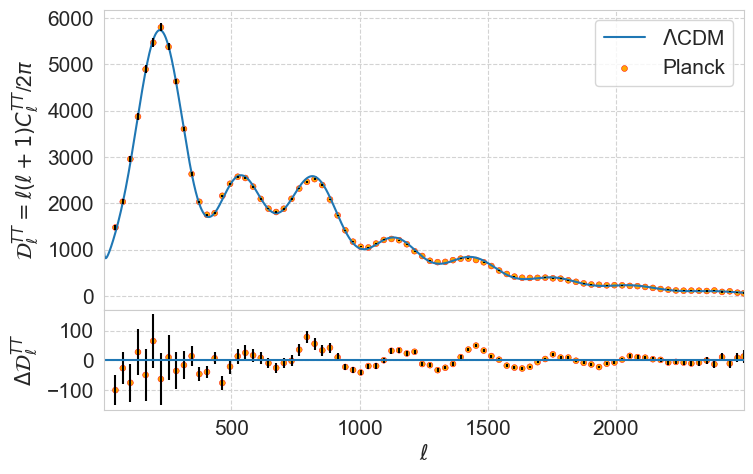

In [11]:
from matplotlib import pyplot as plt
import seaborn as sns

#sns.set_theme()
sns.set_style("whitegrid", {
    'grid.color': 'lightgray',      # Set grid color to gray
    'grid.linestyle': '--',    # Set grid line style to dashed
    'axes.facecolor': 'white'  # Set background color to white
})
palette = sns.color_palette("Dark2", 3) 

#Fontsize
fsize = 15

#Freate ls and dls for the LCDM model
ls = list(range(len(clTT_LCDM)))
dl = Dls(ls,clTT_LCDM)

label = 'TT'
#Plot Planck data + CLASS
fig = plt.figure(figsize=(8,5))
frame1 = fig.add_axes((.1,.3,.8,.6))
sns.lineplot(x=ls, y=dl, label='$\Lambda$CDM')
sns.scatterplot(x=ls_Planck_TT, y= dl_Planck_TT, color='orange', size=2, edgecolor='red', legend=False, label='Planck')
plt.errorbar(ls_Planck_TT, dl_Planck_TT, yerr=sdl_Planck_TT, fmt='o', markersize=0, ecolor = 'black')
plt.xlim(2,2499)
plt.ylabel('$\mathcal{D}^{TT}_{\ell} = {\ell}({\ell}+1) C^{TT}_{\ell}$/2$\pi$', fontsize=fsize)
plt.xticks(fontsize=fsize)
plt.yticks(fontsize=fsize)
plt.legend(fontsize=fsize)

# Residual plot
frame2 = fig.add_axes((.1,.1,.8,.2), sharex=frame1) 
round_ls_Pl_TT = np.round(ls_Planck_TT)
diff = []
for i, j in zip(round_ls_Pl_TT,dl_Planck_TT):
    diff.append(dl[int(i)] - j) #int because i outputs a .0 number, not integer

sns.scatterplot(x=ls_Planck_TT, y= diff, color='orange', size=2, edgecolor='red', legend=False)
plt.errorbar(ls_Planck_TT, diff, yerr=sdl_Planck_TT, fmt='o', markersize=0, ecolor='black')
plt.ylabel('$\Delta \mathcal{D}^{TT}_{\ell}$', fontsize=fsize)
plt.xlabel('${\ell}$', fontsize=fsize)
frame2.axhline(y=0, linestyle='-')
plt.xticks(fontsize=fsize)
plt.yticks(fontsize=fsize)
plt.savefig('LCDM_Planck_cls_%s.pdf' %label)
plt.show()

## Plot the $C^{TE}_{\ell}$ polarization mode, Planck data + CLASS ΛCDM

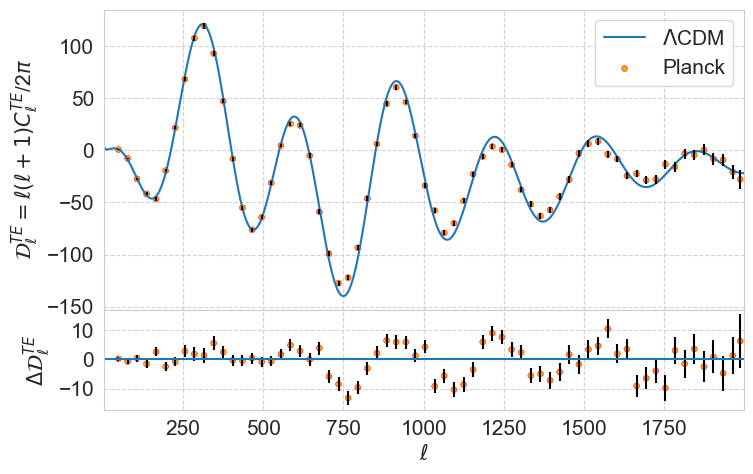

In [14]:
#sns.set_theme()
sns.set_style("whitegrid", {
    'grid.color': 'lightgray',      # Set grid color to gray
    'grid.linestyle': '--',    # Set grid line style to dashed
    'axes.facecolor': 'white'  # Set background color to white
})
palette = sns.color_palette("Dark2", 3) 

label = 'TE'
fig = plt.figure(figsize=(8,5))

#Plot Planck data + CLASS
frame1 = fig.add_axes((.1,.3,.8,.6))
sns.lineplot(x=ll, y=Dls(ll,clTE_LCDM), label='$\Lambda$CDM')
sns.scatterplot(x=ls_Planck_TE, y= dl_Planck_TE, color='orange', size=2, edgecolor='red', legend=False, label='Planck')
plt.errorbar(ls_Planck_TE, dl_Planck_TE, yerr=sdl_Planck_TE, fmt='o', markersize=0, ecolor = 'black')
plt.xlim(2,1999)
plt.ylabel('$\mathcal{D}^{TE}_{\ell} = {\ell}({\ell}+1) C^{TE}_{\ell}$/2$\pi$', fontsize=fsize)
plt.xticks(fontsize=fsize)
plt.yticks(fontsize=fsize)
plt.legend(fontsize=fsize)

# Residual plot
frame2 = fig.add_axes((.1,.1,.8,.2), sharex=frame1) 
round_ls_Pl_TE = np.round(ls_Planck_TE)
diff = []
dl = Dls(ll, clTE_LCDM)
for i, j in zip(round_ls_Pl_TE,dl_Planck_TE):
    diff.append(dl[int(i)] - j) #int because i outputs a .0 number, not integer

sns.scatterplot(x=ls_Planck_TE, y= diff, color='orange', size=2, edgecolor='red', legend=False)
plt.errorbar(ls_Planck_TE, diff, yerr=sdl_Planck_TE, fmt='o', markersize=0, ecolor='black')
plt.ylabel('$\Delta \mathcal{D}^{TE}_{\ell}$', fontsize=fsize)
plt.xlabel('${\ell}$', fontsize=fsize)
plt.xticks(fontsize=fsize)
plt.yticks(fontsize=fsize)
frame2.axhline(y=0, linestyle='-')

plt.savefig('LCDM_Planck_cls_%s.pdf' %label)
plt.show()

## Plot the $C^{EE}_{\ell}$ polarization mode, Planck data + CLASS ΛCDM

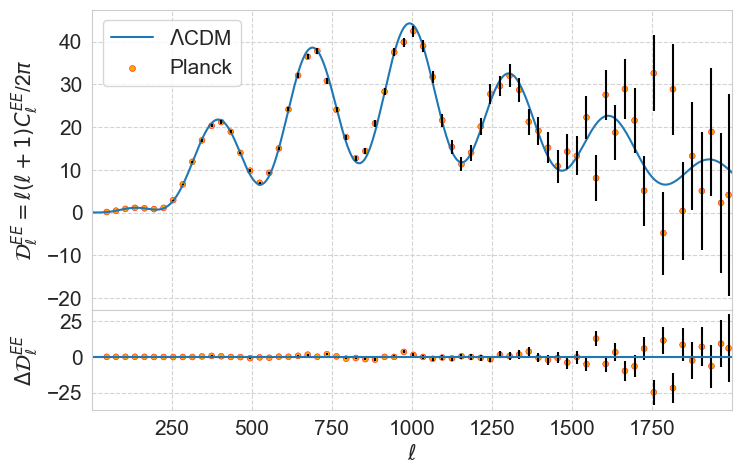

In [17]:
#sns.set_theme()
sns.set_style("whitegrid", {
    'grid.color': 'lightgray',      # Set grid color to gray
    'grid.linestyle': '--',    # Set grid line style to dashed
    'axes.facecolor': 'white'  # Set background color to white
})
palette = sns.color_palette("Dark2", 3) 

label = 'EE'

#Plot Planck data + CLASS
fig = plt.figure(figsize=(8,5))
frame1 = fig.add_axes((.1,.3,.8,.6))
sns.lineplot(x=ll, y=Dls(ll,clEE_LCDM), label='$\Lambda$CDM')
sns.scatterplot(x=ls_Planck_EE, y= dl_Planck_EE, color='orange', size=2, edgecolor='red', legend=False, label='Planck')
plt.errorbar(ls_Planck_EE, dl_Planck_EE, yerr=sdl_Planck_EE, fmt='o', markersize=0, ecolor = 'black')
plt.xlim(2,1999)
plt.ylabel('$\mathcal{D}^{EE}_{\ell} = {\ell}({\ell}+1) C^{EE}_{\ell}$/2$\pi$', fontsize=fsize)
plt.xticks(fontsize=fsize)
plt.yticks(fontsize=fsize)
plt.legend(fontsize=fsize)

# Residual plot
frame2 = fig.add_axes((.1,.1,.8,.2), sharex=frame1) 
round_ls_Pl_EE = np.round(ls_Planck_EE)
diff = []
dl = Dls(ll, clEE_LCDM)
for i, j in zip(round_ls_Pl_EE,dl_Planck_EE):
    diff.append(dl[int(i)] - j) #int because i outputs a .0 number, not integer

sns.scatterplot(x=ls_Planck_EE, y= diff, color='orange', size=2, edgecolor='red', legend=False)
plt.errorbar(ls_Planck_EE, diff, yerr=sdl_Planck_EE, fmt='o', markersize=0, ecolor='black')
plt.ylabel('$\Delta \mathcal{D}^{EE}_{\ell}$', fontsize=fsize)
plt.xlabel('${\ell}$', fontsize=fsize)
frame2.axhline(y=0, linestyle='-')
plt.xticks(fontsize=fsize)
plt.yticks(fontsize=fsize)
plt.savefig('LCDM_Planck_cls_%s.pdf' %label)
plt.show()